# Tensorflow 範例1

In [1]:
import tensorflow as tf
import numpy as np

### create data

In [2]:
## 隨機生成100個數列 type=float32
x_data = np.random.rand(100).astype(np.float32)

In [3]:
## 要預測的 weight接近0.1 biases接近0.3
y_data = x_data*0.1 + 0.3

### create tensopflow structure start ###

In [4]:
## 隨機數列生成 1維 範圍-1到1之間
Weights = tf.Variable(tf.random_uniform([1],-1.0,1.0))
## 初始值為0 1維
biases = tf.Variable(tf.zeros([1]))
## y = W*0.1+0.3
y = Weights*x_data + biases
## 計算預測的y和實際的y的差別
loss = tf.reduce_mean(tf.square(y-y_data))
## 建立優化器 使用GradientDescentOptimizer 學習效率0.5 一般小於1
optimizer = tf.train.GradientDescentOptimizer(0.5)
## 減少誤差 提升參數準確度
train = optimizer.minimize(loss)
## 上面只是建立 這邊才初始化
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


### create tensopflow structure end ###

### 把結構激活初始化

In [5]:
## 神經網路的指針
sess = tf.Session()
## 指針指向init激活
## 重要
sess.run(init)

for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(Weights), sess.run(biases))

0 [ 0.44348013] [ 0.15806383]
20 [ 0.1926955] [ 0.25127953]
40 [ 0.12622967] [ 0.28621379]
60 [ 0.10742211] [ 0.29609898]
80 [ 0.1021002] [ 0.29889616]
100 [ 0.10059429] [ 0.29968765]
120 [ 0.10016818] [ 0.29991162]
140 [ 0.1000476] [ 0.29997501]
160 [ 0.10001348] [ 0.29999292]
180 [ 0.10000385] [ 0.29999799]
200 [ 0.10000108] [ 0.29999945]


# Tensorflow 範例 Session

In [6]:
import tensorflow as ts

In [7]:
## 一行兩列
matrix1 = tf.constant([[3, 3]])

In [8]:
## 兩行一列
matrix2 = tf.constant([[2],[2]])

In [9]:
## 矩陣乘法  matrix multiply
## np.dot(m1, m2)
product = tf.matmul(matrix1, matrix2) 

### method 1

In [10]:
sess = tf.Session()

In [11]:
result = sess.run(product)

In [12]:
print(result)

[[12]]


In [13]:
sess.close()

### method 2

In [14]:
with tf.Session() as sess:
    result2 = sess.run(product)
    print(result2)

[[12]]


# Tensorflow 範例 Varible

In [15]:
import tensorflow as tf

In [16]:
## 如果有定義Varible,就一定要有init=tf.initialize_all_variables(), sess.run(init)
state = tf.Variable(0, name = "counter")

In [17]:
print(state.name)

counter:0


In [18]:
## 常量1
one = tf.constant(1)

In [19]:
## 新的變量值
new_value = tf.add(state, one)

In [20]:
## 將new_value 這個變量,加載到state
update = tf.assign(state, new_value)

In [21]:
## 一定要有
## must have if define varible
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [22]:
with tf.Session() as sess:
    sess.run(init)
    for _ in range(3):
        sess.run(update)
        print(sess.run(state))

1
2
3


# Tensorflow 範例 placeholder

###  sess.run 才定義值就用placeholder

In [23]:
import tensorflow as tf

In [24]:
## 給定type
input1 = tf.placeholder(tf.float32)

In [25]:
input2 = tf.placeholder(tf.float32)

In [26]:
output = tf.multiply(input1, input2)

In [27]:
with tf.Session() as sess:
    print(sess.run(output, feed_dict={input1:[7.],input2:[2.]}))

[ 14.]


# Tensorflow 範例 activation function激勵函數

In [28]:
import tensorflow as tf
import numpy as np

In [29]:
## 定義一個增加層
def add_layer(inputs, in_size, out_size, activation_function=None):
## 定義權重 隨機變量
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
## 機器學習中 biases 推薦不為0
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
## Weights * x * plus + biases
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
## 如果沒有激活函數
    if activation_function is None:
        outputs = Wx_plus_b
## 有的話
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

In [30]:
## 輸入層 -1到+1之間 300個
x_data = np.linspace(-1,1,300)[:, np.newaxis]

In [31]:
x_data

array([[-1.        ],
       [-0.99331104],
       [-0.98662207],
       [-0.97993311],
       [-0.97324415],
       [-0.96655518],
       [-0.95986622],
       [-0.95317726],
       [-0.94648829],
       [-0.93979933],
       [-0.93311037],
       [-0.9264214 ],
       [-0.91973244],
       [-0.91304348],
       [-0.90635452],
       [-0.89966555],
       [-0.89297659],
       [-0.88628763],
       [-0.87959866],
       [-0.8729097 ],
       [-0.86622074],
       [-0.85953177],
       [-0.85284281],
       [-0.84615385],
       [-0.83946488],
       [-0.83277592],
       [-0.82608696],
       [-0.81939799],
       [-0.81270903],
       [-0.80602007],
       [-0.7993311 ],
       [-0.79264214],
       [-0.78595318],
       [-0.77926421],
       [-0.77257525],
       [-0.76588629],
       [-0.75919732],
       [-0.75250836],
       [-0.7458194 ],
       [-0.73913043],
       [-0.73244147],
       [-0.72575251],
       [-0.71906355],
       [-0.71237458],
       [-0.70568562],
       [-0

In [32]:
## 增加噪點 更像真實數據
noise = np.random.normal(0, 0.05, x_data.shape)

In [33]:
noise

array([[-0.06332415],
       [ 0.05652018],
       [ 0.04823826],
       [ 0.0398254 ],
       [ 0.04524938],
       [ 0.09735696],
       [-0.02073219],
       [-0.00611824],
       [-0.02503094],
       [-0.02423715],
       [-0.06443504],
       [-0.07731952],
       [ 0.05361295],
       [-0.03649031],
       [-0.05879509],
       [-0.05317363],
       [-0.05962982],
       [-0.01119417],
       [ 0.05750726],
       [ 0.01842044],
       [ 0.01846078],
       [ 0.01913487],
       [-0.01504898],
       [-0.0300913 ],
       [ 0.01477335],
       [-0.01223365],
       [ 0.02096344],
       [-0.05290887],
       [-0.01800538],
       [ 0.01114596],
       [ 0.02516683],
       [ 0.06839273],
       [-0.08364587],
       [-0.04351759],
       [ 0.10631485],
       [-0.00338694],
       [-0.01333746],
       [-0.01871476],
       [ 0.14428176],
       [-0.01612948],
       [ 0.01646155],
       [ 0.03784786],
       [ 0.02393427],
       [ 0.05857249],
       [ 0.05621182],
       [ 0

In [34]:
## 輸出層 x的2次方-0.5 +噪點
y_data = np.square(x_data) - 0.5 + noise

In [35]:
y_data

array([[ 0.43667585],
       [ 0.54318699],
       [ 0.52166137],
       [ 0.5000943 ],
       [ 0.49245355],
       [ 0.53158588],
       [ 0.40061097],
       [ 0.40242864],
       [ 0.37080915],
       [ 0.35898563],
       [ 0.30625992],
       [ 0.2809371 ],
       [ 0.39952071],
       [ 0.29715809],
       [ 0.26268341],
       [ 0.25622448],
       [ 0.23777737],
       [ 0.27431159],
       [ 0.33120107],
       [ 0.28039178],
       [ 0.26879914],
       [ 0.25792974],
       [ 0.21229188],
       [ 0.18588503],
       [ 0.21947463],
       [ 0.18128209],
       [ 0.2033831 ],
       [ 0.1185042 ],
       [ 0.14249059],
       [ 0.16081431],
       [ 0.16409704],
       [ 0.19667429],
       [ 0.03407653],
       [ 0.06373512],
       [ 0.20318737],
       [ 0.08319487],
       [ 0.06304312],
       [ 0.04755407],
       [ 0.20052834],
       [ 0.03018432],
       [ 0.05293206],
       [ 0.06456457],
       [ 0.04098665],
       [ 0.06605003],
       [ 0.05420401],
       [ 0

In [36]:
## None就是接受任何型態的值 屬性1
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

In [37]:
## 隱藏層 input = 1 output = 10
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)

In [38]:
## 輸出層 input = 10 output = 1
prediction = add_layer(l1, 10, 1, activation_function=None)

In [39]:
## 與真實值的差別
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                     reduction_indices=[1]))

In [40]:
## 訓練 學習效率0.1 誤差越小
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [41]:
## 初始
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [42]:
for i in range(1000):
    # training
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # to see the step improvement
        print(sess.run(loss, feed_dict={xs: x_data, ys: y_data}))

0.306286
0.00716604
0.00642072
0.00610944
0.00588096
0.00570199
0.00553978
0.00538861
0.00525355
0.00511424
0.00495895
0.00480486
0.0046583
0.00450028
0.00435299
0.00423944
0.00415345
0.00408154
0.00401196
0.00394517


# Tensorflow 範例 plot result結果可視化 

In [43]:
# !pip install matplotlib

In [44]:
import matplotlib
%matplotlib inline

# %matplotlib notebook

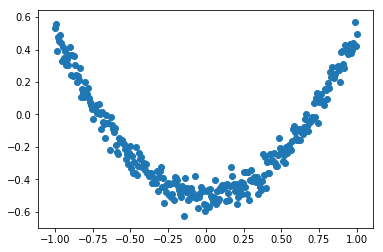

In [45]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def add_layer(inputs, in_size, out_size, activation_function=None):
    # add one more layer and return the output of this layer
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

# Make up some real data
x_data = np.linspace(-1,1,300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])
# add hidden layer
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
# add output layer
prediction = add_layer(l1, 10, 1, activation_function=None)

# the error between prediciton and real data
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                     reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# important step
# tf.initialize_all_variables() no long valid from
# 2017-03-02 if using tensorflow >= 0.12
if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# plot the real data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
## 連續plot
plt.ion()
## show plot
plt.show()

for i in range(1000):
    # training
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # to visualize the result and improvement
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs: x_data})
        # plot the prediction
        lines = ax.plot(x_data, prediction_value, "r-", lw=5)
        plt.pause(0.1)


# Tensorflow 可視化

In [46]:
import tensorflow as tf


def add_layer(inputs, in_size, out_size, activation_function=None):
    # add one more layer and return the output of this layer
    with tf.name_scope('layer'):
        with tf.name_scope('weights'):
            Weights = tf.Variable(tf.random_normal([in_size, out_size]), name='W')
        with tf.name_scope('biases'):
            biases = tf.Variable(tf.zeros([1, out_size]) + 0.1, name='b')
        with tf.name_scope('Wx_plus_b'):
            Wx_plus_b = tf.add(tf.matmul(inputs, Weights), biases)
        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b, )
        return outputs


# define placeholder for inputs to network
with tf.name_scope('inputs'):
    xs = tf.placeholder(tf.float32, [None, 1], name='x_input')
    ys = tf.placeholder(tf.float32, [None, 1], name='y_input')

# add hidden layer
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
# add output layer
prediction = add_layer(l1, 10, 1, activation_function=None)

# the error between prediciton and real data
with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                                        reduction_indices=[1]))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

sess = tf.Session()

# tf.train.SummaryWriter soon be deprecated, use following
if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:  # tensorflow version < 0.12
    writer = tf.train.SummaryWriter('logs/', sess.graph)
else: # tensorflow version >= 0.12
    writer = tf.summary.FileWriter("logs/", sess.graph)

# tf.initialize_all_variables() no long valid from
# 2017-03-02 if using tensorflow >= 0.12
if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()
sess.run(init)

# direct to the local dir and run this in terminal:
## 在logs資料夾同一層開CMD
# $ tensorboard --logdir=logs

In [47]:
import tensorflow as tf
import numpy as np


def add_layer(inputs, in_size, out_size, n_layer, activation_function=None):
    # add one more layer and return the output of this layer
    layer_name = 'layer%s' % n_layer
    with tf.name_scope(layer_name):
        with tf.name_scope('weights'):
            Weights = tf.Variable(tf.random_normal([in_size, out_size]), name='W')
            tf.summary.histogram(layer_name + '/weights', Weights)
        with tf.name_scope('biases'):
            biases = tf.Variable(tf.zeros([1, out_size]) + 0.1, name='b')
            tf.summary.histogram(layer_name + '/biases', biases)
        with tf.name_scope('Wx_plus_b'):
            Wx_plus_b = tf.add(tf.matmul(inputs, Weights), biases)
        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b, )
        tf.summary.histogram(layer_name + '/outputs', outputs)
    return outputs


# Make up some real data
x_data = np.linspace(-1, 1, 300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

# define placeholder for inputs to network
with tf.name_scope('inputs'):
    xs = tf.placeholder(tf.float32, [None, 1], name='x_input')
    ys = tf.placeholder(tf.float32, [None, 1], name='y_input')

# add hidden layer
l1 = add_layer(xs, 1, 10, n_layer=1, activation_function=tf.nn.relu)
# add output layer
prediction = add_layer(l1, 10, 1, n_layer=2, activation_function=None)

# the error between prediciton and real data
with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                                        reduction_indices=[1]))
    tf.summary.scalar('loss', loss)

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

sess = tf.Session()
merged = tf.summary.merge_all()

writer = tf.summary.FileWriter("logs/", sess.graph)

init = tf.global_variables_initializer()
sess.run(init)

for i in range(1000):
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        result = sess.run(merged,
                          feed_dict={xs: x_data, ys: y_data})
        writer.add_summary(result, i)

# direct to the local dir and run this in terminal:
# $ tensorboard --logdir logs

# Tensorflow 範例 classification 分類學習

In [49]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
# number 1 to 10 data
## 如果沒有會自動下載
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

def add_layer(inputs, in_size, out_size, activation_function=None,):
    # add one more layer and return the output of this layer
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1,)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b,)
    return outputs

def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys})
    return result

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 784]) # 28x28
## 如果是1>[1000000000], 如果是2>[01000000000],所以有10個
ys = tf.placeholder(tf.float32, [None, 10])

# add output layer
## classification可以用softmax
prediction = add_layer(xs, 784, 10,  activation_function=tf.nn.softmax)

# the error between prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))  # loss
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.Session()
# important step
# tf.initialize_all_variables() no long valid from
# 2017-03-02 if using tensorflow >= 0.12
if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()
sess.run(init)

for i in range(1000):
    ## 100個X,Y的sample
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys})
    if i % 50 == 0:
        print(compute_accuracy(
            ## 用test Data
            mnist.test.images, mnist.test.labels))

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
0.0793
0.6361
0.7305
0.7793
0.8055
0.8166
0.8334
0.8343
0.8466
0.8508
0.856
0.8569
0.8617
0.8644
0.8635
0.8696
0.869
0.8722
0.8707
0.8728
